In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#### Density Plot

In [4]:
data = pd.read_csv("mpg.csv")
data.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


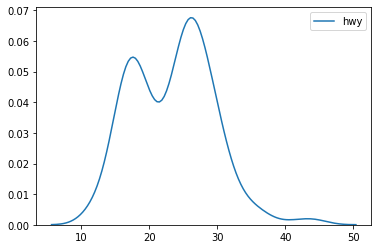

In [5]:
plt. figure()

sns.kdeplot(data.hwy)#Kernal Density Plot, Only working with 1 variable for all the dataset here.

# The Y-axis does not show much, but you can see the skewness of the data. Bimodal?

plt.show()

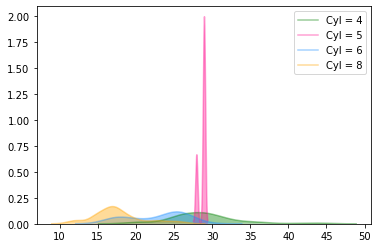

In [18]:
## Show different groups

plt. figure()

#First Density Plot

sns.kdeplot(data.loc[data.cyl ==4,'hwy'],
            shade = True,
           color = "green",
           label = "Cyl = 4",
           alpha = 0.4)

sns.kdeplot(data.loc[data.cyl ==5,'hwy'],
            shade = True,
           color = "deeppink",
           label = "Cyl = 5",
           alpha =0.4)

sns.kdeplot(data.loc[data.cyl ==6,'hwy'],
            shade = True,
           color = "dodgerblue",
           label = "Cyl = 6",
           alpha =0.4)

sns.kdeplot(data.loc[data.cyl ==8,'hwy'],
            shade = True,
           color = "orange",
           label = "Cyl = 8",
           alpha =0.4)

plt.show()

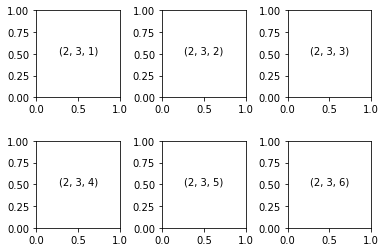

In [35]:
# Using for-loop to create sub-plots

plt.subplots_adjust(hspace=0.5,wspace=0.5)#adjust gap between rows of plots

for i in range(1,7):# Range will need to be y-1
    plt.subplot(2,3,i)
    plt.text(0.5,0.5,str((2,3,i)),ha = "center") #HA = Horizontal Alignment/ VA= Vertical Alignment
    

<Figure size 432x288 with 0 Axes>

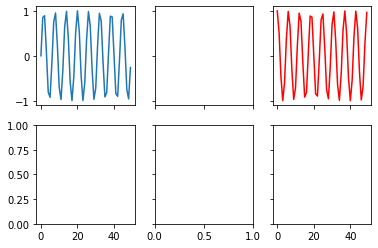

In [45]:
# Create a 2X3 Graph with sin and cost plots
plt.figure()

fig,ax = plt.subplots(2,3,sharex='col',sharey='row') 

# We don't need to use a for-loop

x=np.linspace(0,50)
ax[0,0].plot(np.sin(x))
ax[0,2].plot(np.cos(x),color="red")
#Created from 0 to 50 equal linearspace

plt.show()

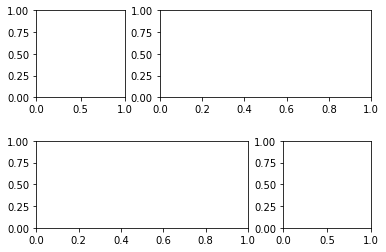

In [55]:
#4. Merging some grid to make a bigger graph

fig = plt.figure() # Give the figure a name so it could be modified later

grid = plt.GridSpec(2,3,wspace = 0.4,hspace=0.5)

fig.add_subplot(grid[0,0])
fig.add_subplot(grid[0,1:3]) # Needs to go to 3 to include 2
fig.add_subplot(grid[1,0:2]) 
fig.add_subplot(grid[1,2]) 

plt.show()

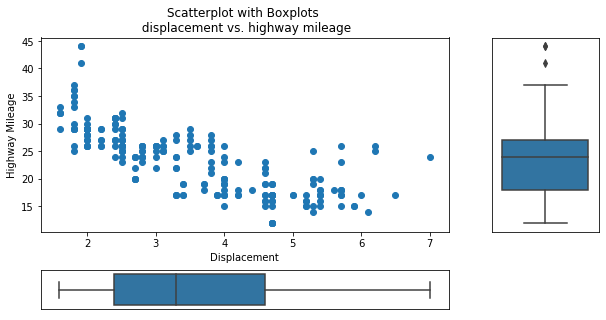

In [108]:
### 5. Marginal Boxplots:
fig=plt.figure(figsize=(10,5))

gri5 = plt.GridSpec(4,4,wspace = 0.4,hspace=1)


ax_main = fig.add_subplot(gri5[0:-1,0:3]) # Or fig.add_subplot(gri5[0:3,0:3])
ax_right = fig.add_subplot(gri5[0:3,3])
ax_bottom = fig.add_subplot(gri5[3,0:3])

# Plotting the Main Graph
ax_main.scatter(data.displ,data.hwy)


#Plot the Right Box Plot
sns.boxplot(data.hwy,ax= ax_right,orient = 'v')
ax_right.set(xticks =[],yticks=[],ylabel="")#Removing the axis labels and the label

#Plot the Bottom Box Plot
sns.boxplot(data.displ,ax= ax_bottom)
ax_bottom.set(xticks =[],yticks=[],xlabel="")#Removing the axis labels and the label

#Add Title to Graph, X-label and Y-label
ax_main.set(title="Scatterplot with Boxplots \n displacement vs. highway mileage",
            xlabel="Displacement",ylabel="Highway Mileage")


plt.show()


In [109]:
# Changing Data to Economics
econ = pd.read_csv("economics.csv")
econ.head()

,date,pce,pop,psavert,uempmed,unemploy
0,1967-07-01,507.4,198712,12.5,4.5,2944
1,1967-08-01,510.5,198911,12.5,4.7,2945
2,1967-09-01,516.3,199113,11.7,4.6,2958
3,1967-10-01,512.9,199311,12.5,4.9,3143
4,1967-11-01,518.1,199498,12.5,4.7,3066


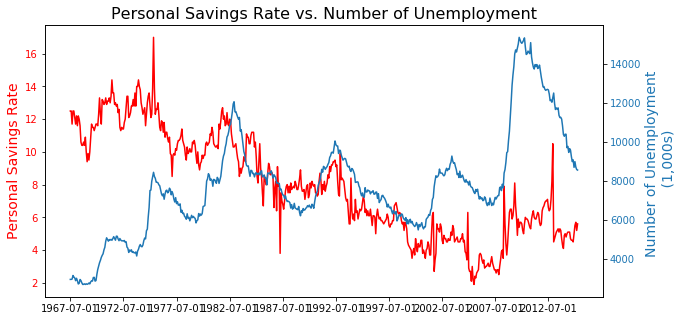

In [128]:
fig = plt.figure(figsize=(10,5)) #It's safer to use it because we need to refer to it later

plt.plot(econ.date,econ.psavert,color='red')

ax=plt.gca() #Define first to be safe

# Set the main y-axis (on the left)
ax.tick_params(axis='y',labelcolor = 'red')#
ax.set_ylabel("Personal Savings Rate",color='red',fontsize=14)

# Set Secondary Y-axis (on the right)
ax_right = ax.twinx() #Create a twin y-axis that share the same x axis values
ax_right.plot(econ.date,econ.unemploy, color='tab:blue')
ax_right.tick_params(axis = 'y',labelcolor='tab:blue')
ax_right.set_ylabel("Number of Unemployment \n (1,000s)",color='tab:blue',fontsize=14)

#Set the x-axis labels and color
ax.set_xticks(np.arange(0,len(econ.date),60))


plt.title("Personal Savings Rate vs. Number of Unemployment",fontsize=16)
plt.show()


### Link for Additional Graphs:
https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/#2.-Bubble-plot-with-Encircling

### Advice: Do not use Pie-Chart. Avoid if possible.